In [70]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
import numpy as np

In [71]:
with MPRester("7QuxsitdhRpT0oyz") as m:

    bandstructure = m.get_bandstructure_by_material_id("mp-23209")

Bande interdite indirecte dont l'énergie vaut 5.2267 eV


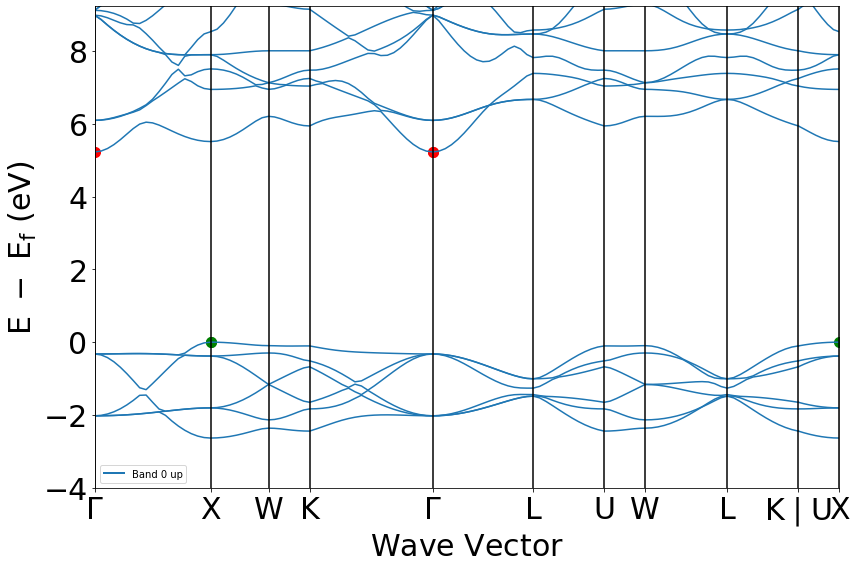

In [72]:
# Bande interdite

BSPlot = BSPlotter(bandstructure)
BSPlot.get_plot(vbm_cbm_marker=True)
band_gap = bandstructure.get_band_gap()

if band_gap['direct']:
    print("Bande interdite directe dont l'énergie vaut", band_gap["energy"], "eV")
else:
    print("Bande interdite indirecte dont l'énergie vaut", band_gap["energy"], "eV")


In [73]:
#  Direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion

data = BSPlot.bs_plot_data()['distances']
energy = BSPlot.bs_plot_data()['energy']

# Pentes
slope_val = np.empty_like(data)
slope_cond = np.empty_like(data)

for i in range(len(data)):
    slope_val[i] = abs((energy['1'][i][11][0] - energy['1'][i][11][-1])/(data[i][-1]-data[i][0]))
    slope_cond[i] = abs((energy['1'][i][12][0] - energy['1'][i][12][-1])/(data[i][-1]-data[i][0]))

# Maximas et minimas
max_val = np.argmax(slope_val)
min_val = np.argmin(slope_val)
max_cond = np.argmax(slope_cond)
min_cond = np.argmin(slope_cond)

<string>:6: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



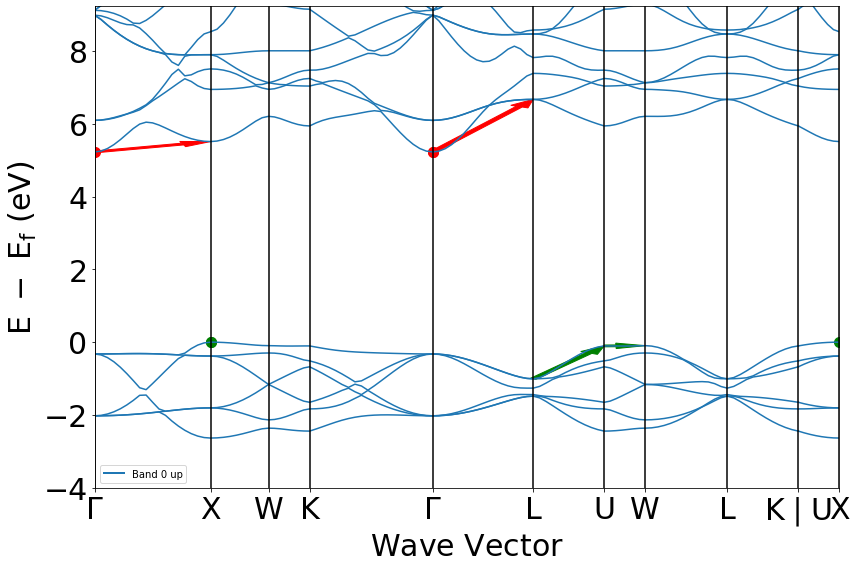

In [74]:
# Flèches représentant les pentes maximales et minimales des bandes de valence et de conduction respectivement

BSPlott.get_plot(vbm_cbm_marker=True)
plt.arrow(data[min_val][0],energy['1'][min_val][11][0],data[min_val][-1]-data[min_val][0],energy['1'][min_val][11][-1]-energy['1'][min_val][11][0],width = 0.05,length_includes_head=True,color='green') #Flèche pour la plus petite pente de la bande de valence
plt.arrow(data[max_val][0],energy['1'][max_val][11][0],data[max_val][-1]-data[max_val][0],energy['1'][max_val][11][-1]-energy['1'][max_val][11][0],width = 0.05,length_includes_head=True,color='green') #Flèche pour la plus grande pente de la bande de valence
plt.arrow(data[min_cond][0],energy['1'][min_cond][12][0],data[min_cond][-1]-data[min_cond][0],energy['1'][min_cond][12][-1]-energy['1'][min_cond][12][0],width = 0.05,length_includes_head=True,color='red')  #Flèche pour la plus petite pente de la bande de conduction
plt.arrow(data[max_cond][0],energy['1'][max_cond][12][0],data[max_cond][-1]-data[max_cond][0],energy['1'][max_cond][12][-1]-energy['1'][max_cond][12][0],width = 0.05,length_includes_head=True,color='red')  #Flèche pour la plus grande pente de la bande de conduction
plt.show()

In [75]:
# Calcul de la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) 
# en supposant une dispersion parabolique

maximas_valence = BSPlot.bs_plot_data()['vbm']
minimas_conduction = BSPlot.bs_plot_data()['cbm']

local_max_valence = 0
local_min_conduction = 0

for i in range(len(data)):
    if data[i][-1] == 0.8915827741553324: 
        local_max_valence = i
    if data[i][-1] == 2.598262612421718: 
        local_min_conduction = i

print("Sommets de la dernière bande de valence : ", maximas_valence)
print("Bases de la première bande de conduction : ", minimas_conduction)

Sommets de la dernière bande de valence :  [(0.8915827741553324, 0.0), (0.8915827741553324, 0.0), (5.723245825673383, 0.0)]
Bases de la première bande de conduction :  [(0.0, 5.2267), (2.598262612421718, 5.2267), (2.598262612421718, 5.2267)]


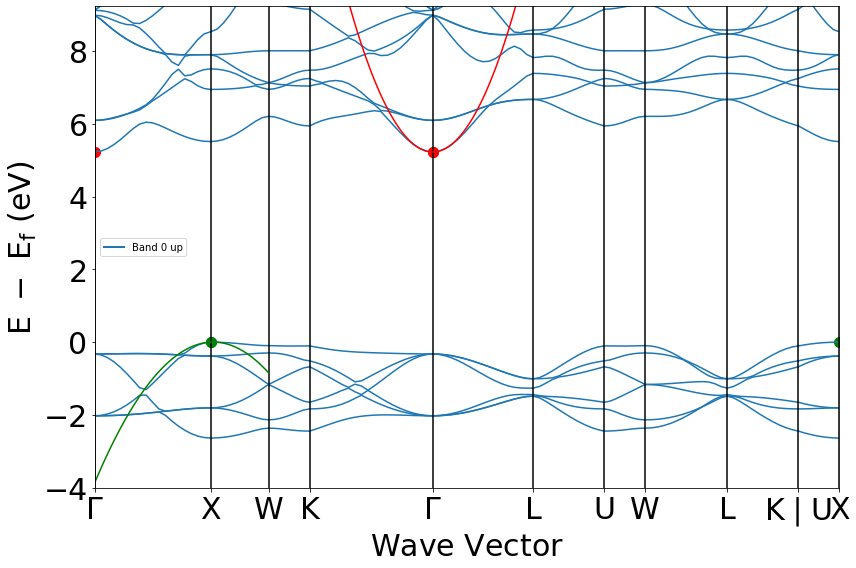

Masse effective au sommet de la dernière bande de valence : -9.33376978396969 unités atomiques
Masse effective à la base de la première bande de conduction : 19.72530122663302 unités atomiques


In [76]:
dist_val = [data[local_max_valence][-2], data[local_max_valence][-1], data[local_max_valence+1][1]]
dist_cond = [data[local_min_conduction][-2], data[local_min_conduction][-1], data[local_min_conduction+1][1]]

energy_val = [energy['1'][local_max_valence][11][-2],energy['1'][local_max_valence][11][-1],energy['1'][local_max_valence+1][11][1]]
energy_cond = [energy['1'][local_min_conduction][12][-2],energy['1'][local_min_conduction][12][-1],energy['1'][local_min_conduction+1][12][1]]

coeff_val = np.polyfit(dist_val, energy_val, 2)
coeff_cond= np.polyfit(dist_cond, energy_cond, 2)

k_val = np.linspace(data[local_max_valence][0], data[local_max_valence+1][-1], 100)
k_cond = np.linspace(data[local_min_conduction][0], data[local_min_conduction+1][-1], 100)

BSPlot.get_plot(vbm_cbm_marker=True)
plt.plot(k_val, coeff_val[0]*k_val**2 + coeff_val[1]*k_val + coeff_val[2], color='green')
plt.plot(k_cond, coeff_cond[0]*k_cond**2 + coeff_cond[1]*k_cond + coeff_cond[2], color='red')
plt.show()

print("Masse effective au sommet de la dernière bande de valence :", 2*coeff_val[0], "unités atomiques")
print("Masse effective à la base de la première bande de conduction :", 2*coeff_cond[0], "unités atomiques")